# Objectif

L’organisme de gestion d’un système de location de vélos en libre-service (ex: Vélib) cherche à organiser ses équipes de maintenance pour répondre au mieux à la demande de ses clients.

Descriptif de l'ensemble des variables :
* *instant* - index du relevé
* *dteday* - date du relevé 
* *season* - 1 = hiver, 2 = printemps, 3 = été, 4 = automne 
* *mnth* - mois du relevé (entre 1 et 12)
* *hr* - heure du relevé (entre 0 et 23)
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *weekday* - day of the week
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

## Imports des librairies

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extraction et prise en main de la donnée

In [61]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


In [62]:
df.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [63]:
df.describe()

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15715.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.774038,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.321135,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.500000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [64]:
# Analyse de la qualité des données

print("Shape du dataset:", df.shape)
print("\nValeurs manquantes:")
print(df.isnull().sum())

print("\nValeurs uniques pour les variables catégorielles:")
print("season:", sorted(df['season'].unique()))
print("mnth:", sorted(df['mnth'].unique()))
print("weekday:", sorted(df['weekday'].unique()))
print("holiday:", sorted(df['holiday'].unique()))
print("weathersit:", sorted(df['weathersit'].unique()))

print("\nVérification des valeurs aberrantes:")
print(df.describe())

# Analyse des relations
print("\nCorrélation avec la variable cible cnt:")
corr_with_target = df.select_dtypes(include=[np.number]).corr()['cnt'].sort_values(ascending=False)
print(corr_with_target)


Shape du dataset: (17379, 15)

Valeurs manquantes:
instant          0
dteday           0
season           0
mnth             0
hr               0
holiday          0
weekday          0
weathersit       0
temp             0
atemp            0
hum           1664
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

Valeurs uniques pour les variables catégorielles:
season: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
mnth: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
weekday: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
holiday: [np.int64(0), np.int64(1)]
weathersit: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Vérification des valeurs aberrantes:
          instant        season          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000

**Résumé de l'analyse de qualité des données :**

Le dataset contient 17 379 observations et 15 variables. L'analyse révèle plusieurs points importants :

**Points positifs :**
- Structure cohérente avec toutes les variables catégorielles ayant des valeurs dans les plages attendues
- Pas de valeurs aberrantes évidentes dans les variables numériques
- Variables temporelles bien codées (saison : 1-4, mois : 1-12, jour : 0-6, heure : 0-23)

**Points négatifs :**
- **1 664 valeurs manquantes** pour la variable `hum` (humidité), soit environ 9,6% des données
- Certaines variables comme `atemp` et `hum` ont des valeurs minimales égales à 0, ce qui pourrait être physiquement improbable (température ressentie de 0°C, humidité de 0%)

**Corrélations avec la variable cible `cnt` :**
- Corrélation très forte avec `registered` (0.97) et `casual` (0.69), ce qui est logique car cnt = casual + registered
- Corrélation modérée positive avec `temp` (0.40), `atemp` (0.40) et `hr` (0.39)
- Corrélation négative avec `hum` (-0.32) et `weathersit` (-0.14)

**Conclusion :** Le descriptif des variables semble globalement cohérent, mais il serait nécessaire de :
1. Traiter les valeurs manquantes de l'humidité
2. Vérifier si les valeurs 0 dans certaines variables sont réalistes ou représentent des données manquantes encodées
3. Confirmer que les variables `casual` et `registered` ne créeront pas de multicolinéarité dans les modèles

## Préparation

In [65]:
# Variables catégorielles
cat_vars = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']

# Variables numériques
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

print("Variables catégorielles:", cat_vars)
print("Variables numériques:", num_vars)

Variables catégorielles: ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']
Variables numériques: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [66]:
for c in cat_vars:
    df[c] = df[c].astype('category')

## Exploration

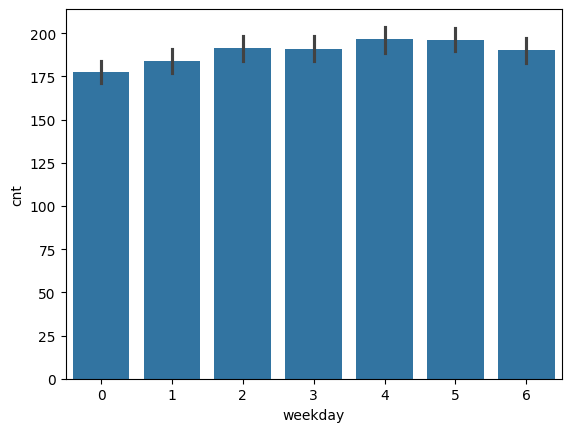

In [67]:
sns.barplot(x="weekday", y="cnt", data=df, estimator=np.mean)
plt.show()

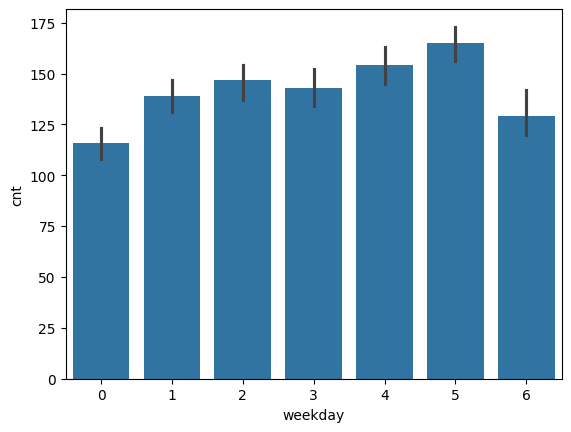

In [68]:
sns.barplot(x="weekday", y="cnt", data=df, estimator=np.median)
plt.show()

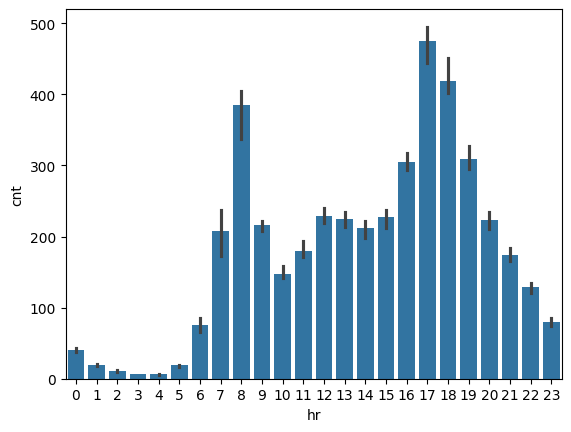

In [69]:
sns.barplot(x="hr", y="cnt", data=df, estimator=np.median)
plt.show()

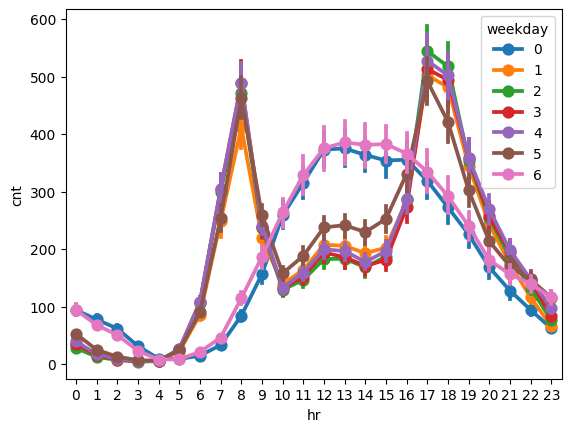

In [70]:
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday')
plt.show()

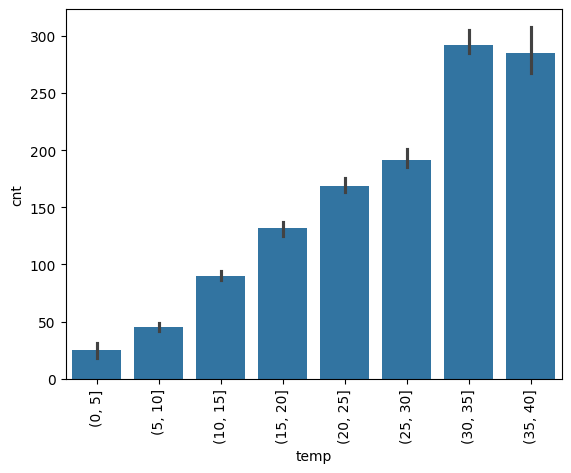

In [71]:
temp_range = range(0, round(df["temp"].max()), 5)
temp_binned = pd.cut(df["temp"], bins=temp_range)
temp_plot = sns.barplot(x=temp_binned, y=df["cnt"], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

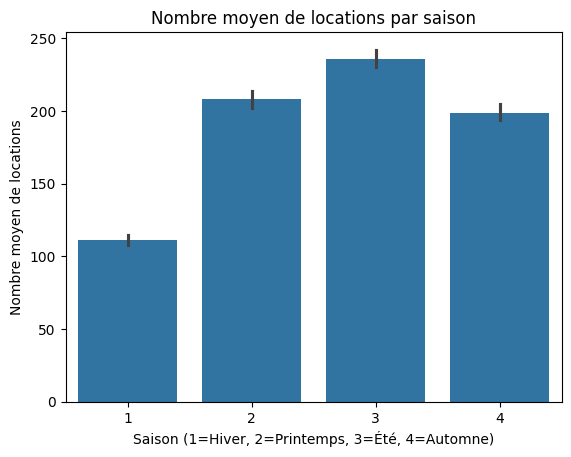

In [72]:
# Graphique 1: Impact de la saison
sns.barplot(x="season", y="cnt", data=df, estimator=np.mean)
plt.title("Nombre moyen de locations par saison")
plt.xlabel("Saison (1=Hiver, 2=Printemps, 3=Été, 4=Automne)")
plt.ylabel("Nombre moyen de locations")
plt.show()

# Analyse: On observe des variations significatives selon les saisons. 
# L'été (saison 3) semble avoir le plus de locations en moyenne.


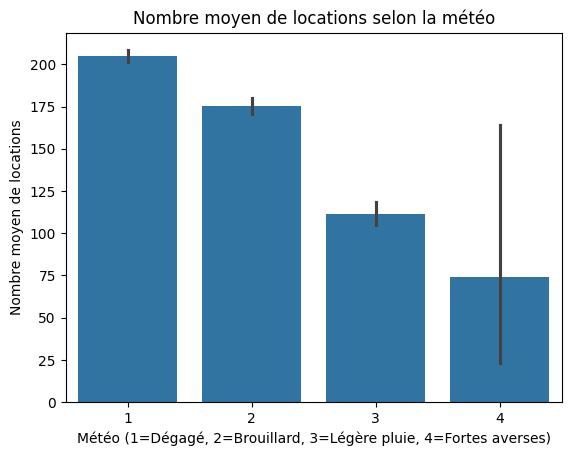

In [73]:
# Graphique 2: Impact de la météo
sns.barplot(x="weathersit", y="cnt", data=df, estimator=np.mean)
plt.title("Nombre moyen de locations selon la météo")
plt.xlabel("Météo (1=Dégagé, 2=Brouillard, 3=Légère pluie, 4=Fortes averses)")
plt.ylabel("Nombre moyen de locations")
plt.show()

# Analyse: La météo a un impact majeur. Les conditions dégagées (1) favorisent 
# nettement les locations, tandis que les mauvaises conditions météo (3, 4) 
# réduisent significativement l'utilisation.


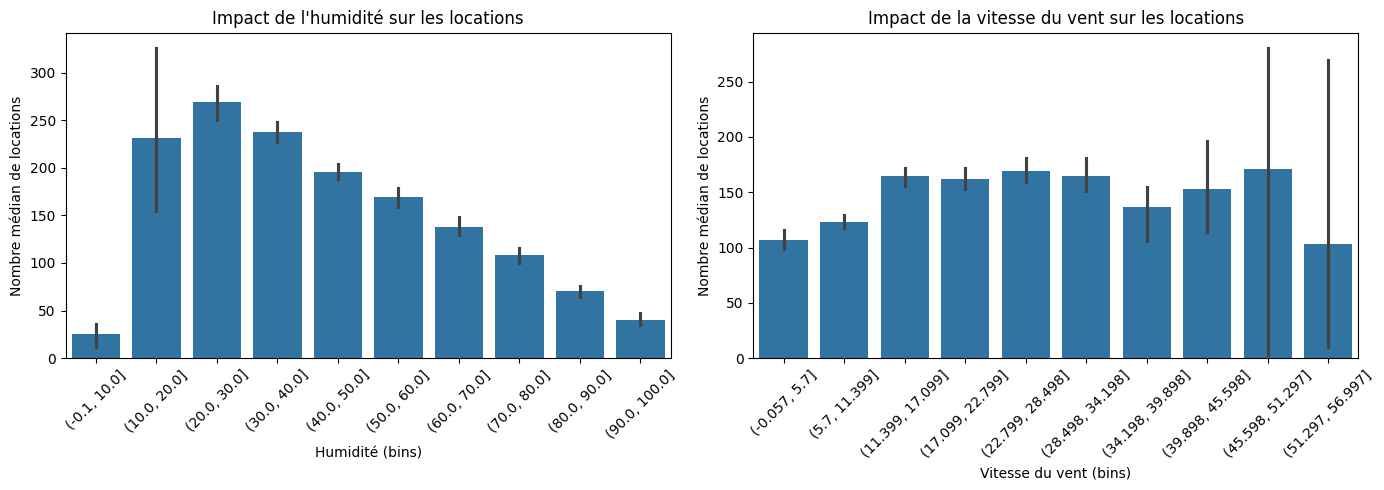

In [74]:
# Graphique 3: Impact de l'humidité et de la température
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Humidité
humidity_binned = pd.cut(df["hum"], bins=10)
sns.barplot(x=humidity_binned, y=df["cnt"], estimator=np.median, ax=axes[0])
axes[0].set_title("Impact de l'humidité sur les locations")
axes[0].set_xlabel("Humidité (bins)")
axes[0].set_ylabel("Nombre médian de locations")
axes[0].tick_params(axis='x', rotation=45)

# Vitesse du vent
windspeed_binned = pd.cut(df["windspeed"], bins=10)
sns.barplot(x=windspeed_binned, y=df["cnt"], estimator=np.median, ax=axes[1])
axes[1].set_title("Impact de la vitesse du vent sur les locations")
axes[1].set_xlabel("Vitesse du vent (bins)")
axes[1].set_ylabel("Nombre médian de locations")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyse: L'humidité et la vitesse du vent ont également un impact, 
# bien que moins prononcé que la température ou la météo.


### Approche non-supervisée

In [75]:
# Import pour le clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Préparation des données pour le clustering (sélection de features numériques)
features_clustering = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
X_clust = df[features_clustering].dropna()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au dataframe
df_clust = X_clust.copy()
df_clust['cluster'] = clusters



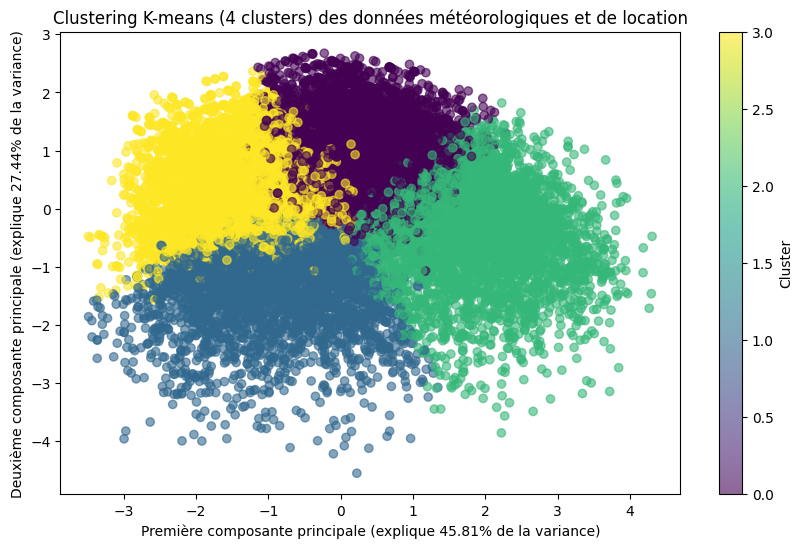

In [76]:
# Visualisation des clusters avec PCA pour la réduction de dimensionnalité
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Première composante principale (explique {pca.explained_variance_ratio_[0]:.2%} de la variance)')
plt.ylabel(f'Deuxième composante principale (explique {pca.explained_variance_ratio_[1]:.2%} de la variance)')
plt.title('Clustering K-means (4 clusters) des données météorologiques et de location')
plt.show()


In [77]:
# Analyse des caractéristiques des clusters
print("Caractéristiques moyennes par cluster:")
print(df_clust.groupby('cluster')[features_clustering].mean())
print("\nNombre d'observations par cluster:")
print(df_clust['cluster'].value_counts().sort_index())

# Analyse: Les clusters permettent d'identifier des profils de demande similaires 
# basés sur les conditions météorologiques et la demande. Cela peut aider à 
# comprendre les patterns de location et à organiser la maintenance de manière plus efficace.


Caractéristiques moyennes par cluster:
              temp      atemp        hum  windspeed         cnt
cluster                                                        
0        24.273241  28.047461  77.580706   9.967361  118.950820
1        14.246511  16.678318  46.608777  20.707417  155.227824
2        28.656098  32.687636  49.448391  14.024109  400.369884
3        12.106421  15.264539  71.392589   8.106380   89.927961

Nombre d'observations par cluster:
cluster
0    4758
1    3213
2    3885
3    3859
Name: count, dtype: int64


## Feature Engineering

In [78]:
# Création d'une nouvelle feature: is_weekend
# weekday: 0=Dimanche, 1=Lundi, 2=Mardi, 3=Mercredi, 4=Jeudi, 5=Vendredi, 6=Samedi
df['is_weekend'] = (df['weekday'] == 0) | (df['weekday'] == 6)
df['is_weekend'] = df['is_weekend'].astype(int)

# Création d'une feature: is_rush_hour (heures de pointe)
# Les heures de pointe sont généralement 7-9h (matin) et 17-19h (soir)
# Note: on convertit hr en numérique pour les comparaisons (car hr est une catégorie)
hr_numeric = pd.to_numeric(df['hr'])
df['is_rush_hour'] = ((hr_numeric >= 7) & (hr_numeric <= 9)) | ((hr_numeric >= 17) & (hr_numeric <= 19))
df['is_rush_hour'] = df['is_rush_hour'].astype(int)

# Création d'une feature: temp_humidity_interaction (interaction température * humidité)
df['temp_humidity_interaction'] = df['temp'] * df['hum']

print("Nouvelles features créées:")
print("- is_weekend: weekend (1) ou jour de semaine (0)")
print("- is_rush_hour: heure de pointe (1) ou non (0)")
print("- temp_humidity_interaction: interaction température * humidité")
print("\nVérification:")
print(df[['is_weekend', 'is_rush_hour', 'temp_humidity_interaction']].head())


Nouvelles features créées:
- is_weekend: weekend (1) ou jour de semaine (0)
- is_rush_hour: heure de pointe (1) ou non (0)
- temp_humidity_interaction: interaction température * humidité

Vérification:
   is_weekend  is_rush_hour  temp_humidity_interaction
0           1             0                     797.04
1           1             0                     721.60
2           1             0                     721.60
3           1             0                     738.00
4           1             0                     738.00


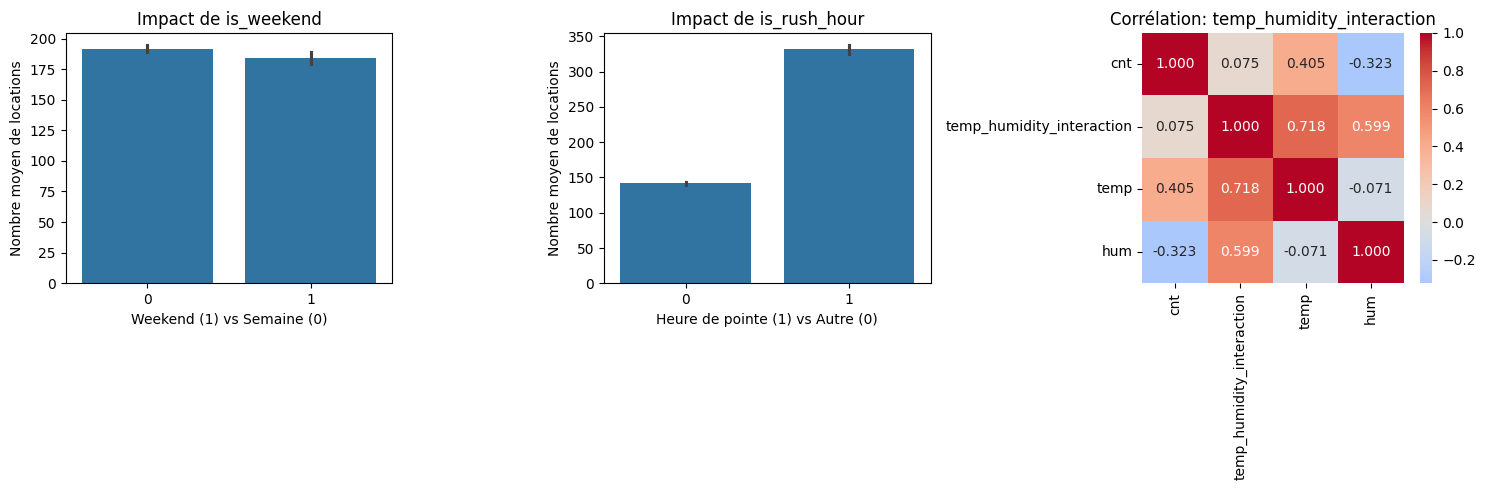

Moyennes par groupe:
Weekend: 183.85201435979258
Semaine: 191.73837444399516

Heure de pointe: 331.58484085184335
Autres heures: 141.76513987088842


In [79]:
# Évaluation de l'apport des nouvelles features
# Comparaison des moyennes de locations selon is_weekend
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# is_weekend
sns.barplot(x="is_weekend", y="cnt", data=df, estimator=np.mean, ax=axes[0])
axes[0].set_title("Impact de is_weekend")
axes[0].set_xlabel("Weekend (1) vs Semaine (0)")
axes[0].set_ylabel("Nombre moyen de locations")

# is_rush_hour
sns.barplot(x="is_rush_hour", y="cnt", data=df, estimator=np.mean, ax=axes[1])
axes[1].set_title("Impact de is_rush_hour")
axes[1].set_xlabel("Heure de pointe (1) vs Autre (0)")
axes[1].set_ylabel("Nombre moyen de locations")

# Corrélation avec la nouvelle feature d'interaction
corr_new = df[['cnt', 'temp_humidity_interaction', 'temp', 'hum']].corr()
sns.heatmap(corr_new, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=axes[2])
axes[2].set_title("Corrélation: temp_humidity_interaction")

plt.tight_layout()
plt.show()

print("Moyennes par groupe:")
print("Weekend:", df[df['is_weekend']==1]['cnt'].mean())
print("Semaine:", df[df['is_weekend']==0]['cnt'].mean())
print("\nHeure de pointe:", df[df['is_rush_hour']==1]['cnt'].mean())
print("Autres heures:", df[df['is_rush_hour']==0]['cnt'].mean())

# Analyse: Ces nouvelles features capturent des patterns temporels importants
# (weekend vs semaine, heures de pointe) qui peuvent améliorer les prédictions.


## Algorithmes et Validation (entraînement de l'algorithme prédictif)

In [80]:
from sklearn.model_selection import train_test_split

# Sélection des features (on exclut casual et registered car ce sont des composantes de cnt)
# On exclut aussi instant et dteday qui sont des identifiants
features_to_exclude = ['instant', 'dteday', 'casual', 'registered', 'cnt']
X = df.drop(columns=features_to_exclude)
y = df['cnt']

# Séparation train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille du dataset d'entraînement: {X_train.shape[0]} échantillons")
print(f"Taille du dataset de test: {X_test.shape[0]} échantillons")
print(f"\nFeatures utilisées: {list(X.columns)}")

Taille du dataset d'entraînement: 13903 échantillons
Taille du dataset de test: 3476 échantillons

Features utilisées: ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'is_weekend', 'is_rush_hour', 'temp_humidity_interaction']


### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identification des colonnes catégorielles et numériques
cat_cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']
num_cols = [col for col in X_train.columns if col not in cat_cols]

# Préprocessing: OneHotEncoding pour les catégorielles, pas de transformation pour les numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

# Pipeline: preprocessing + modèle
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Entraînement
print("Entraînement du modèle Random Forest...")
model.fit(X_train, y_train)
print("Modèle entraîné!")


Entraînement du modèle Random Forest...
Modèle entraîné!


=== Performance sur le jeu d'entraînement ===
RMSE: 27.58
MAE: 18.42
R²: 0.9771

=== Performance sur le jeu de test ===
RMSE: 71.49
MAE: 47.71
R²: 0.8386


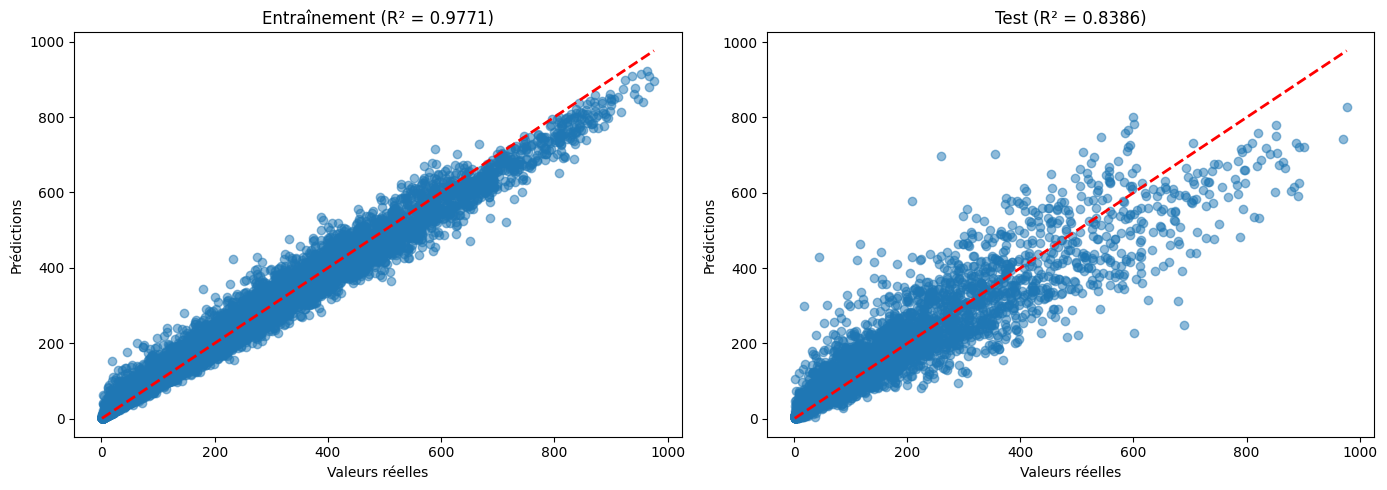

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Performance sur le jeu d'entraînement ===")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

print("\n=== Performance sur le jeu de test ===")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

# Visualisation des prédictions vs valeurs réelles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Valeurs réelles')
axes[0].set_ylabel('Prédictions')
axes[0].set_title(f'Entraînement (R² = {train_r2:.4f})')

axes[1].scatter(y_test, y_test_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Valeurs réelles')
axes[1].set_ylabel('Prédictions')
axes[1].set_title(f'Test (R² = {test_r2:.4f})')

plt.tight_layout()
plt.show()


Analyse: 

- RMSE (Root Mean Squared Error): erreur quadratique moyenne, pénalise les grandes erreurs
- MAE (Mean Absolute Error): erreur absolue moyenne, plus robuste aux outliers
- R² (coefficient de détermination): proportion de variance expliquée (1 = parfait, 0 = modèle basique)
Le modèle semble performant si R² est élevé et si les performances train/test sont proches (pas de sur-apprentissage).

### Régularisation du modèle

In [83]:
# Modèle avec régularisation
model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=15,  # Limite la profondeur (régularisation)
        min_samples_split=10,  # Évite les divisions trop fines
        min_samples_leaf=5,  # Taille minimale des feuilles
        max_features='sqrt',  # Limite le nombre de features par split
        random_state=42,
        n_jobs=-1
    ))
])

# Entraînement du modèle régularisé
print("Entraînement du modèle régularisé...")
model_reg.fit(X_train, y_train)
print("Modèle régularisé entraîné!")


Entraînement du modèle régularisé...
Modèle régularisé entraîné!


In [84]:
# Évaluation du modèle régularisé
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

train_rmse_reg = np.sqrt(mean_squared_error(y_train, y_train_pred_reg))
test_rmse_reg = np.sqrt(mean_squared_error(y_test, y_test_pred_reg))
train_r2_reg = r2_score(y_train, y_train_pred_reg)
test_r2_reg = r2_score(y_test, y_test_pred_reg)

print("=== Comparaison: Modèle original vs Modèle régularisé ===")
print(f"\nModèle original - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.2f}")
print(f"Modèle régularisé - Test R²: {test_r2_reg:.4f}, Test RMSE: {test_rmse_reg:.2f}")

# La régularisation aide à réduire le sur-apprentissage en limitant la complexité du modèle
# et en améliorant la généralisation sur les données de test.


=== Comparaison: Modèle original vs Modèle régularisé ===

Modèle original - Test R²: 0.8386, Test RMSE: 71.49
Modèle régularisé - Test R²: 0.7656, Test RMSE: 86.16


### Choix des meilleurs hyperparamètres

In [85]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [5, 10, 20],
    'regressor__min_samples_leaf': [2, 5, 10]
}

# GridSearchCV avec validation croisée
print("Recherche des meilleurs hyperparamètres avec GridSearchCV...")
grid_search = GridSearchCV(
    model_reg,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # On maximise le score négatif de RMSE
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nMeilleurs hyperparamètres: {grid_search.best_params_}")
print(f"Meilleur score (RMSE négatif): {grid_search.best_score_:.2f}")


Recherche des meilleurs hyperparamètres avec GridSearchCV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Meilleurs hyperparamètres: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Meilleur score (RMSE négatif): -6622.13


=== Performance du modèle optimisé ===
Train R²: 0.9059, Train RMSE: 55.91
Test R²: 0.8137, Test RMSE: 76.80


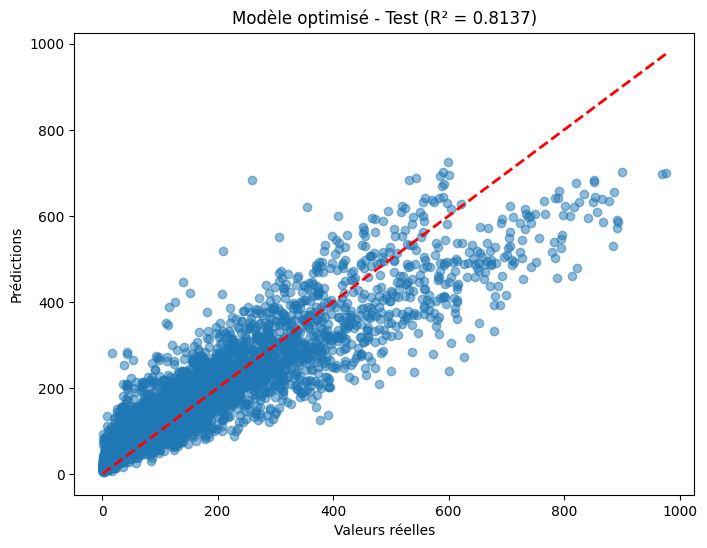

In [86]:
# Modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Évaluation finale
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print("=== Performance du modèle optimisé ===")
print(f"Train R²: {train_r2_best:.4f}, Train RMSE: {train_rmse_best:.2f}")
print(f"Test R²: {test_r2_best:.4f}, Test RMSE: {test_rmse_best:.2f}")

# Visualisation des résultats
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(y_test, y_test_pred_best, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Valeurs réelles')
ax.set_ylabel('Prédictions')
ax.set_title(f'Modèle optimisé - Test (R² = {test_r2_best:.4f})')
plt.show()
